In [ ]:
import sys


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os



In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Submission.csv")

In [ ]:
filenames = !unzip -qq "/content/drive/MyDrive/train.zip"

In [ ]:
import os

image_folder = '/content/drive/MyDrive/train'
filenames = os.listdir(image_folder)
categories = []

for filename in filenames:
  category = filename.split('.')[0]
  if category == 'dog':
      categories.append(1)
  else:
      categories.append(0)

df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})



In [ ]:
df.head()

,filename,category
0,cat.10001.jpg,0
1,cat.1000.jpg,0
2,cat.1.jpg,0
3,cat.0.jpg,0
4,cat.10.jpg,0


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['category']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'category'}, axis=1)
              .sort_values('category', ascending=True))
  xs = counted['category']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('category', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('filename')):
  _plot_series(series, series_name, i)
  fig.legend(title='filename', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('category')
_ = plt.ylabel('count()')

In [ ]:
df.tail()

,filename,category
788,dog.2684.jpg,1
789,dog.2681.jpg,1
790,dog.2679.jpg,1
791,dog.2685.jpg,1
792,dog.2683.jpg,1


<Axes: xlabel='category'>

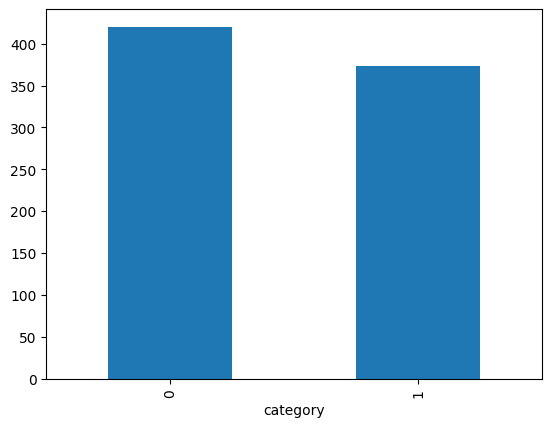

In [ ]:
df['category'].value_counts().plot.bar()

In [ ]:
sample = random.choice(filenames)
image = load_img(image_folder + sample)
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/traincat.10044.jpg'

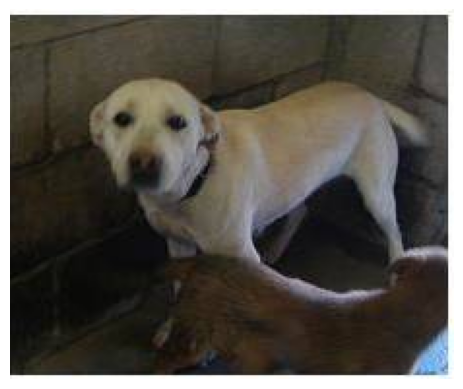

In [ ]:
# 이미지 파일 경로 설정 (예: 구글 드라이브 경로)
image_folder = '/content/drive/MyDrive/train/'

# 파일명 리스트 가져오기
filenames = os.listdir(image_folder)

# 파일명에 대한 전체 경로 구성
file_paths = [os.path.join(image_folder, f) for f in filenames]

# 랜덤으로 파일 하나 선택
sample = random.choice(file_paths)

# 이미지 로드 및 시각화
image = load_img(sample)
plt.imshow(image)
plt.axis('off')  # 축 숨기기
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer = 'rmsprop', metrics = ['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 61, 61, 64)       

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystop = EarlyStopping(patience = 10)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr = 0.00001)

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)


<Axes: xlabel='category'>

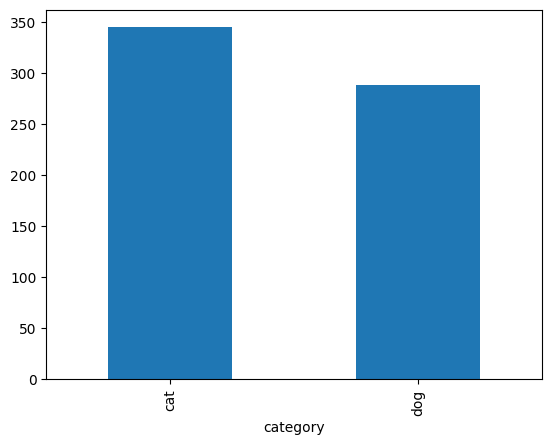

In [ ]:
train_df['category'].value_counts().plot.bar()

<Axes: xlabel='category'>

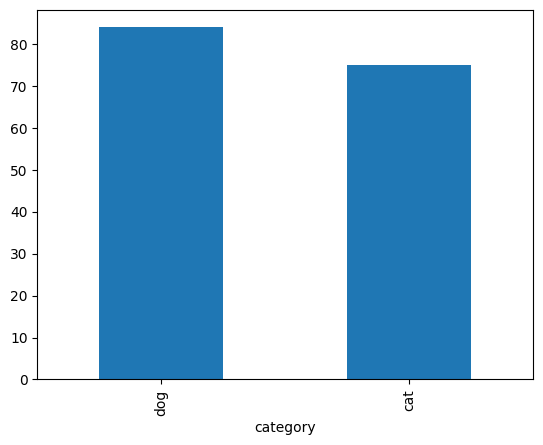

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size =15

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/drive/MyDrive/train/",
    x_col = 'filename',
    y_col = 'category',
    target_size=IMAGE_SIZE,
    class_mode ='categorical',
    batch_size=batch_size

)

Found 634 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/drive/MyDrive/train/",
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 159 validated image filenames belonging to 2 classes.


In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/content/drive/MyDrive/train/",
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical'
)

Found 1 validated image filenames belonging to 1 classes.


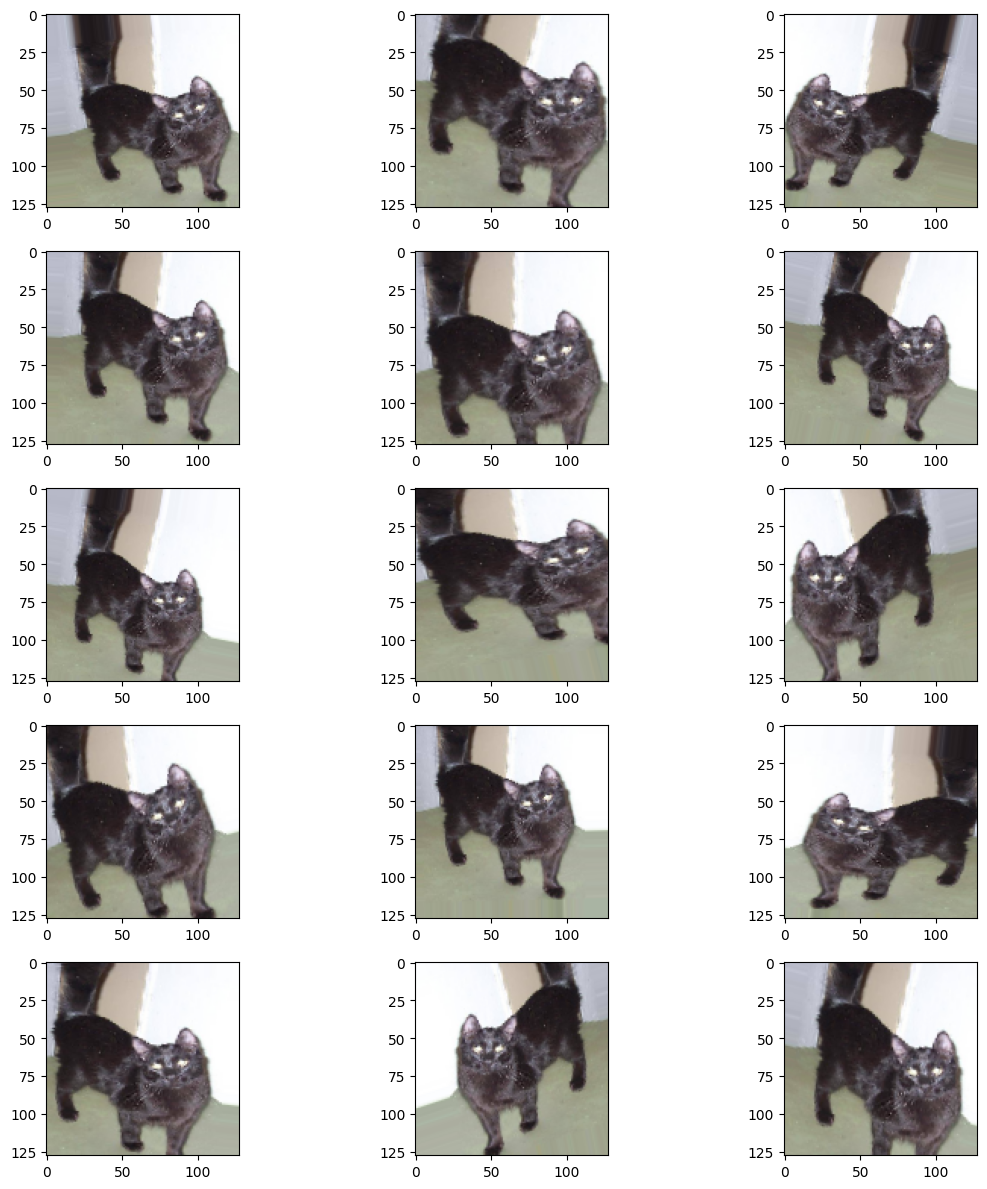

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
epochs = 3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
42/42 [==============================] - ETA: 0s - loss: 1.7047 - accuracy: 0.5040

42/42 [==============================] - 217s 5s/step - loss: 1.7047 - accuracy: 0.5040 - val_loss: 1.9085 - val_accuracy: 0.5200 - lr: 0.0010
Epoch 2/50
42/42 [==============================] - ETA: 0s - loss: 1.1326 - accuracy: 0.5832

42/42 [==============================] - 38s 891ms/step - loss: 1.1326 - accuracy: 0.5832 - val_loss: 1.1899 - val_accuracy: 0.4600 - lr: 0.0010
Epoch 3/50
42/42 [==============================] - ETA: 0s - loss: 1.0398 - accuracy: 0.5719

42/42 [==============================] - 41s 966ms/step - loss: 1.0398 - accuracy: 0.5719 - val_loss: 1.6881 - val_accuracy: 0.5133 - lr: 0.0010
Epoch 4/50
42/42 [==============================] - ETA: 0s - loss: 0.9669 - accuracy: 0.5735

42/42 [==============================] - 38s 901ms/step - loss: 0.9669 - accuracy: 0.5735 - val_loss: 1.2385 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 5/50
42/42 [==============================] - ETA: 0s - loss: 0.9218 - accuracy: 0.5670

42/42 [==============================] - 41s 977ms/step - loss: 0.9218 - accuracy: 0.5670 - val_loss: 1.0324 - val_accuracy: 0.5200 - lr: 0.0010
Epoch 6/50
42/42 [==============================] - ETA: 0s - loss: 0.8525 - accuracy: 0.5800

42/42 [==============================] - 37s 881ms/step - loss: 0.8525 - accuracy: 0.5800 - val_loss: 0.8850 - val_accuracy: 0.5200 - lr: 0.0010
Epoch 7/50
42/42 [==============================] - ETA: 0s - loss: 0.7774 - accuracy: 0.6365

42/42 [==============================] - 40s 933ms/step - loss: 0.7774 - accuracy: 0.6365 - val_loss: 1.3481 - val_accuracy: 0.4800 - lr: 0.0010
Epoch 8/50
42/42 [==============================] - ETA: 0s - loss: 0.7725 - accuracy: 0.6365

42/42 [==============================] - 37s 878ms/step - loss: 0.7725 - accuracy: 0.6365 - val_loss: 0.8566 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 9/50
42/42 [==============================] - ETA: 0s - loss: 0.7577 - accuracy: 0.6139

42/42 [==============================] - 38s 909ms/step - loss: 0.7577 - accuracy: 0.6139 - val_loss: 1.0645 - val_accuracy: 0.4867 - lr: 0.0010
Epoch 10/50
42/42 [==============================] - ETA: 0s - loss: 0.6471 - accuracy: 0.6898

42/42 [==============================] - 40s 943ms/step - loss: 0.6471 - accuracy: 0.6898 - val_loss: 1.3825 - val_accuracy: 0.4867 - lr: 0.0010
Epoch 11/50
42/42 [==============================] - ETA: 0s - loss: 0.6721 - accuracy: 0.6430

42/42 [==============================] - 38s 905ms/step - loss: 0.6721 - accuracy: 0.6430 - val_loss: 0.6680 - val_accuracy: 0.5800 - lr: 0.0010
Epoch 12/50
42/42 [==============================] - ETA: 0s - loss: 0.6179 - accuracy: 0.6882

42/42 [==============================] - 39s 915ms/step - loss: 0.6179 - accuracy: 0.6882 - val_loss: 1.0377 - val_accuracy: 0.5533 - lr: 0.0010
Epoch 13/50
42/42 [==============================] - ETA: 0s - loss: 0.6349 - accuracy: 0.6672

42/42 [==============================] - 38s 899ms/step - loss: 0.6349 - accuracy: 0.6672 - val_loss: 0.8297 - val_accuracy: 0.5933 - lr: 0.0010
Epoch 14/50
42/42 [==============================] - ETA: 0s - loss: 0.6289 - accuracy: 0.7027

42/42 [==============================] - 37s 877ms/step - loss: 0.6289 - accuracy: 0.7027 - val_loss: 0.8119 - val_accuracy: 0.5933 - lr: 0.0010
Epoch 15/50
42/42 [==============================] - ETA: 0s - loss: 0.5989 - accuracy: 0.7189

42/42 [==============================] - 40s 961ms/step - loss: 0.5989 - accuracy: 0.7189 - val_loss: 0.6385 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 16/50
42/42 [==============================] - ETA: 0s - loss: 0.5610 - accuracy: 0.7334

42/42 [==============================] - 38s 899ms/step - loss: 0.5610 - accuracy: 0.7334 - val_loss: 0.6895 - val_accuracy: 0.6267 - lr: 0.0010
Epoch 17/50
42/42 [==============================] - ETA: 0s - loss: 0.5482 - accuracy: 0.7124

42/42 [==============================] - 41s 975ms/step - loss: 0.5482 - accuracy: 0.7124 - val_loss: 0.7529 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 18/50
42/42 [==============================] - ETA: 0s - loss: 0.5622 - accuracy: 0.7189

42/42 [==============================] - 37s 881ms/step - loss: 0.5622 - accuracy: 0.7189 - val_loss: 0.5849 - val_accuracy: 0.6867 - lr: 0.0010
Epoch 19/50
42/42 [==============================] - ETA: 0s - loss: 0.5482 - accuracy: 0.7189

42/42 [==============================] - 40s 942ms/step - loss: 0.5482 - accuracy: 0.7189 - val_loss: 0.8032 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 20/50
42/42 [==============================] - ETA: 0s - loss: 0.5402 - accuracy: 0.7286

42/42 [==============================] - 42s 989ms/step - loss: 0.5402 - accuracy: 0.7286 - val_loss: 0.7601 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 21/50
42/42 [==============================] - ETA: 0s - loss: 0.5441 - accuracy: 0.7480

42/42 [==============================] - 37s 889ms/step - loss: 0.5441 - accuracy: 0.7480 - val_loss: 1.0916 - val_accuracy: 0.5267 - lr: 0.0010
Epoch 22/50
42/42 [==============================] - ETA: 0s - loss: 0.5693 - accuracy: 0.7205

42/42 [==============================] - 38s 884ms/step - loss: 0.5693 - accuracy: 0.7205 - val_loss: 0.7106 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 23/50
42/42 [==============================] - ETA: 0s - loss: 0.5487 - accuracy: 0.7157

42/42 [==============================] - 38s 895ms/step - loss: 0.5487 - accuracy: 0.7157 - val_loss: 0.6334 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 24/50
42/42 [==============================] - ETA: 0s - loss: 0.5260 - accuracy: 0.7512

42/42 [==============================] - 39s 924ms/step - loss: 0.5260 - accuracy: 0.7512 - val_loss: 0.7133 - val_accuracy: 0.6600 - lr: 0.0010
Epoch 25/50
42/42 [==============================] - ETA: 0s - loss: 0.5065 - accuracy: 0.7561

42/42 [==============================] - 37s 878ms/step - loss: 0.5065 - accuracy: 0.7561 - val_loss: 0.7316 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 26/50
42/42 [==============================] - ETA: 0s - loss: 0.5270 - accuracy: 0.7528

42/42 [==============================] - 40s 946ms/step - loss: 0.5270 - accuracy: 0.7528 - val_loss: 0.7064 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 27/50
42/42 [==============================] - ETA: 0s - loss: 0.4977 - accuracy: 0.7577

42/42 [==============================] - 38s 891ms/step - loss: 0.4977 - accuracy: 0.7577 - val_loss: 0.7631 - val_accuracy: 0.6800 - lr: 0.0010
Epoch 28/50
42/42 [==============================] - ETA: 0s - loss: 0.5164 - accuracy: 0.7415

42/42 [==============================] - 40s 958ms/step - loss: 0.5164 - accuracy: 0.7415 - val_loss: 0.7166 - val_accuracy: 0.6867 - lr: 0.0010


In [ ]:
model.save_weights("model.h5")

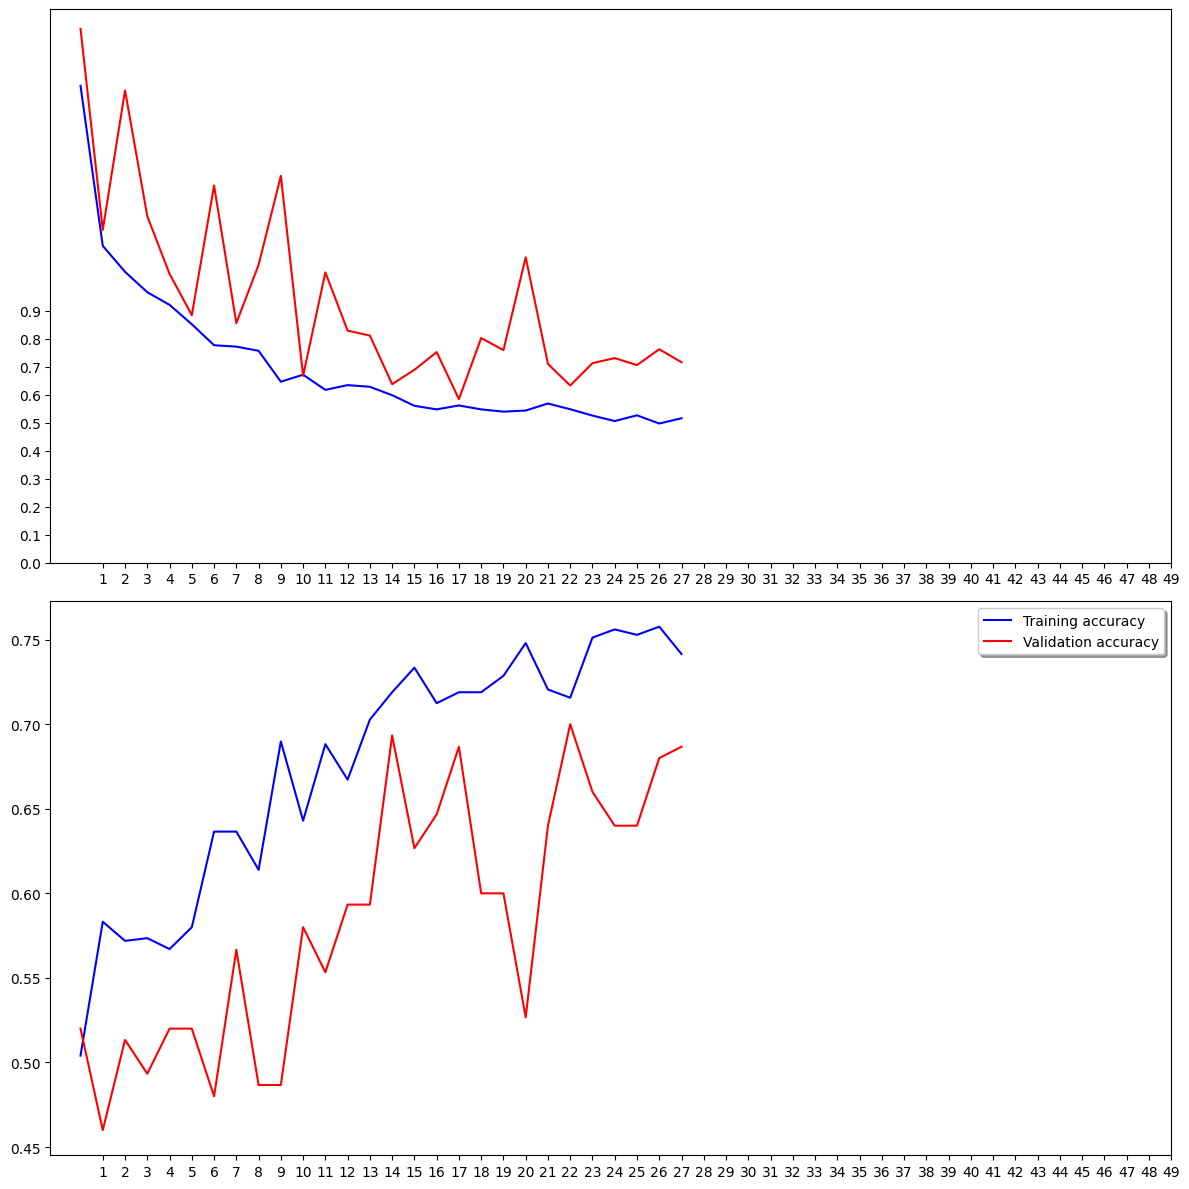

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label = "Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc= 'best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
test_filenames = os.listdir("/content/drive/MyDrive/test1")
test_df = pd.DataFrame({
    'filename' : test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/drive/MyDrive/test1",
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 590 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps = np.ceil(nb_samples/batch_size))

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

<Axes: xlabel='category'>

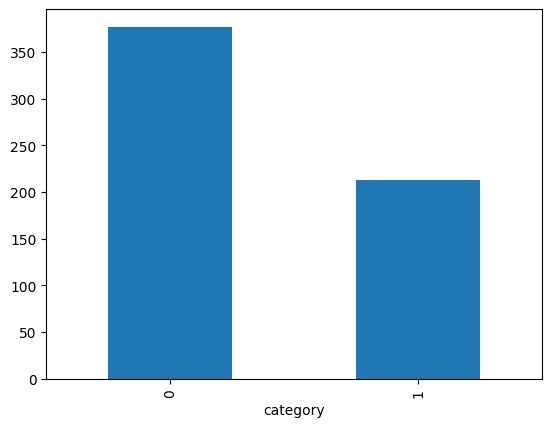

In [ ]:
test_df['category'].value_counts().plot.bar()

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/MyDrive/test1/" + filename, target_size = IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pwd

'/content'

In [6]:
cd /content/drive/MyDrive/commitforgit

/content/drive/MyDrive/commitforgit


In [7]:
pwd

'/content/drive/MyDrive/commitforgit'

In [8]:
!git clone https://github.com/JiminGong/Deeplearn_Train.git

Cloning into 'Deeplearn_Train'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [10]:
cd /content/drive/MyDrive/commitforgit/Deeplearn_Train/

/content/drive/MyDrive/commitforgit/Deeplearn_Train


In [9]:
pwd

'/content/drive/MyDrive/commitforgit'

In [ ]:
!git config --global user.email 'lsj4202@gmail.com'
!git config --global user.name 'JiminGong'

In [ ]:
!git add deeplearn.ipynb

In [ ]:
!git commit -m 'JiminNodd1.1'

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Deeplearn_Train/

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
|!git push

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.02 MiB | 4.45 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/pushing-a-branch-blocked-by-push-protection
remote:     
remote:     
remote:       —— GitHub Personal Access Token ——————————————————————
remote:        locations:
remote:          - commit: 975c087d03d6880cbe5a06ba7f90089d25008720
remote:            path: deeplearn.ipynb:1
remote:     
remote:        (?) To push

In [ ]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Deeplearn_Train/

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git branch -m master main

fatal: A branch named 'main' already exists.


In [ ]:
pwd

'/content/drive/MyDrive/commitforgit'